# El método de Euler aplicado a sistemas de EDOs

En este documento, por un lado se va a implementar el método de Euler, y por otro se aplicará dicho método para simular la evolución de dos sistemas de EDOs distintos.

<ul id="top">
<li><a href="#1-Lotka-Volterra-con-caza-periódica">1-Lotka-Volterra con caza periódica</a></li>
<li><a href="#2-Implementación-del-método-de-Euler">2-Implementación del método de Euler</a></li>
<li><a href="#3-Simulación-de-un-péndulo">3-Simulación de un péndulo</a></li>
<li><a href="#Valoración">Valoración</a></li>
</ul>  

In [1]:
using Plots
using DelimitedFiles

## 1-Lotka-Volterra con caza periódica
### Variante del sistema presa-depredador de Lotka-Volterra con caza periódica

Consideramos la siguiente variante no autónoma del sistema
   presa-depredador de Lotka-Volterra:

<a id='Edo-LV'></a>
\begin{equation*}
\frac{d}{dt} v = \left(a-b w - g(t) \right)\, v, \quad \frac{d}{dt}w = \left(c v-d\right)\, w. \hspace{3em} \tag{1}
\end{equation*}

El tiempo $t$ se mide en meses.
La variable de estado $v$ representa el número de alces de un parque
natural protegido, y $w$ el número de lobos. Los símbolos $a,b,c,d$ se refieren a parámetros constantes del problema, que en nuestro caso fijamos como $a=1$, $b=1/50$, $c=3/100$, $d=1$.
Se supone que los guardas
del parque cazan de forma periódica (con un periodo de doce meses)
cierto porcentaje de alces, porcentaje que varía 
dependiendo de los meses del año, 
donde $g(t)$ es una función períodica de $t$ con un período de 12 meses, que
representa la tasa de caza de alces por unidad de tiempo. Como ejemplo ilustrativo, aquí consideraremos la función 

\begin{equation}
  g(t)= \frac{1}{20} \big(\sin\big(\frac{\pi\, t}{12}\big)\big)^2.
\end{equation}

Dicha función alcanza su valor máximo (igual a $1/20$) a mitad de año, cuando $t=6$, y se anula al principio y final del año (es decir, $t=0$ y $t=12$). 

En las transparencias de la tercera parte del Tema 1 se muestra que el sistema (1) se puede escribir de forma compacta de la forma

<a id='Edo-Compacta'></a>
\begin{equation}
\frac{d}{dt} u = f(t,u,p). \hspace{7em} \tag{2}
\end{equation}


### 1.1- Ejercicio

- **Implementar la función $f$ que hace que el sistema  [(1)](#Edo-LV) sea equivalente a [(2)](#Edo-Compacta).**

In [2]:
function f(t,u,p)
    v=u[1]
    w=u[2]
    a = p[1]
    b = p[2]
    c = p[3]
    d = p[4]
    gt = 1/20 * (sin(π*t/12))^2
    return [(a-b*w - gt) * v, 
            (c*v-d) * w]
end

f (generic function with 1 method)

### 1.2- Ejercicio

- Consideremos la solución $u(t)=(v(t),w(t))$ de [(1)](#Edo-LV) con los datos iniciales $v(0)=51$, $w(0)=33$. **Calcular la aproximación $u_1=(v_1,w_1)$ de $u(t_1)=(v(t_1),w(t_1))$ en $t_1 = 0.025$ aplicando un paso de longitud $h=0.025$ del método de Euler.**

In [3]:
p = [1,1/50,3/100,1]
u0 = [51, 33]
h = 0.025
t0 = 0
t1 = t0 + h
u1 = u0 + h*f(t0,u0,p)

2-element Array{Float64,1}:
 51.4335 
 33.43725

> **Comprobación**
>
>El resultado debería coincidir con el mostrado en el documento 
 <a href="https://egela1819.ehu.eus/mod/resource/view.php?id=1022048">Ilustración del método de Euler para sistemas de EDOs </a> (disponible en el aula virtual).

### 1.3- Ejercicio

- **Hacer otro tanto para calcular la aproximación $u_2=(v_2,w_2)$ de $u(t_2)=(v(t_2),w(t_2))$ en $t_2=2h$ (para $h=0.025$) obtenida por el método de Euler a partir de la aproximación $u_1=(v_1,w_1)$ de $u(t_1)=(v(t_1),w(t_1))$ previamente calculada.**

In [4]:
t2 = t1 + h
u2 = u1 + h*f(t1,u1,p)

2-element Array{Float64,1}:
 51.85943734704205
 33.89116484840625

<a href="#top">Back to the top</a>

## 2-Implementación del método de Euler

Queremos simular numéricamente la evolución de sistemas modelados por 
ecuaciones diferenciales ordinarias (EDOs) de dimensión $d\geq 1$ de la forma [(2)](#Edo-Compacta)
donde $u =(u^1,\ldots,u^d) \in \mathbb{R}^d$ es el _vector de estado_ del sistema, y $p \in \mathbb{R}^m$ es un vector de parámetros constantes del sistema.

Sabemos que, fijado el vector $p$ de parámetros constantes, 
dados $t_0 \in \mathbb{R}$ y $u_0 =(u^1_0,\ldots,u^d_0) \in \mathbb{R}^d$, existe una única solución $u(t)$ de [(2)](#Edo-Compacta) que satisfaga la condición inicial

<a id='Cond-Ini'></a>
\begin{equation}
  u(t_0)=u_0. \hspace{8em} \tag{3}
\end{equation}

En la práctica, nos interesará calcular de forma aproximada la solución $u(t)$ para un cierto intervalo temporal $t \in [t_0,T]$. Se aproximará dicha solución en una discretización del tiempo obtenida de dividir el intervalo temporal $[t_0,T]$ en $n$ partes iguales. Es decir,  se tomará los valores discretos del tiempo $t_0,t_1,t_2,\ldots,t_{n-1},t_n=T$, donde $t_k=t_{0}+k h$, con $h=(T-t_0)/n$, y se calcularán las aproximaciones 
$u_k =(u^1_k,\ldots,u^d_k) \approx u(t_k)$ para $k=0,1,\ldots,n$.

### 2.1 - Ejercicio

- **Para realizar los ejercicios de simulación que siguen, se debe primeramente implementar en Julia el método de Euler. Se definirá una función (que llamaremos Euler) que toma como argumentos de entrada $u0, t0, T, n, f, p$.**
     - El argumento de entrada $f$ es el nombre de una función previamente definida, tal que dados $t \in \mathbb{R}$, un vector $u \in \mathbb{R}^d$, y un vector de parámetros $p\in \mathbb{R}^m$, devuelve un vector $f(t,u,p) \in \mathbb{R}^d$. Dicha función determina un sistema de EDOs de la forma (2).
     - El significado del resto de los argumentos de entrada de dicha función se puede deducir de las consideraciones de arriba. 
     - La función Euler debe devolver como argumento de salida una matriz $W \in \mathbb{R}^{(n+1) \times (d+1)}$
 \begin{eqnarray*}
W = \left(
     \begin{array}{cccc}
t_0    &   u^1_0 & \cdots& u^d_0  \\
t_1    &    u^1_1 & \cdots& u^d_1  \\
\vdots &  \vdots & \ddots& \vdots \\
t_{n}  &      u^1_n & \cdots& u^d_n
     \end{array}
\right),
\end{eqnarray*} 
donde $t_k = t_0 + k \, (T-t_0)/n$, y los vectores $u_k  = (u^1_k,\ldots,u^d_k) \in \mathbb{R}^d$ ($k=1\ldots,n$) son aproximaciones de $u(t_k)$ que se han obtenido aplicando el método de Euler al sistema [(2)](#Edo-Compacta) con la condición inicial [(3)](#Cond-Ini) utilizando una longitud de paso  $h=(T-t_0)/n$.

In [5]:
function  Euler(u0, t0, T, n, f, p)
    h = (T-t0)/n;   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
        duj = f(tj, uj, p)
        uj = uj + h * duj
        tj = tj + h
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

Euler (generic function with 1 method)

### 2.2 - Ejercicio

Una vez implementada la función Euler,
 - **Resolver numéricamente (con el método de Euler) el sistema con valores iniciales $v(0)=51$, $w(0)=33$, para $t\in[0,30]$. Para ello, considerar $n=1200$, y por tanto $h=30/1200=0.025$.**

In [6]:
t0 = 0
T = 30
n = 1200
res = Euler(u0,t0,T,n,f,p)

1201×3 Array{Float64,2}:
  0.0    51.0     33.0   
  0.025  51.4335  33.4372
  0.05   51.8594  33.8912
  0.075  52.2771  34.3621
  0.1    52.6859  34.8503
  0.125  53.0849  35.3561
  0.15   53.4735  35.8799
  0.175  53.8509  36.4218
  0.2    54.2164  36.9823
  0.225  54.5691  37.5615
  0.25   54.9082  38.1598
  0.275  55.233   38.7772
  0.3    55.5426  39.4141
  ⋮                      
 29.725  12.8294  60.4605
 29.75   12.7464  59.5308
 29.775  12.6698  58.6116
 29.8    12.5994  57.7033
 29.825  12.5352  56.806 
 29.85   12.4769  55.9199
 29.875  12.4244  55.0452
 29.9    12.3775  54.182 
 29.925  12.3362  53.3304
 29.95   12.3002  52.4905
 29.975  12.2696  51.6625
 30.0    12.244   50.8464

> **Comprobación**
>
>Los resultados en los primeros tiempos deberían coincidir con los mostrados en el documento 
 <a href="https://egela1819.ehu.eus/mod/resource/view.php?id=1022048">Ilustración del método de Euler para sistemas de EDOs </a> (disponible en el aula virtual). 

 - **Obtener una figura con las gráficas de ambas componentes de la solución con respecto del tiempo.**

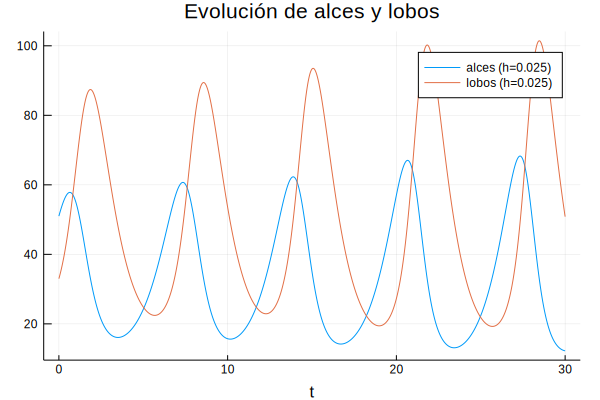

In [7]:
tt = res[:,1]
vv = res[:,2]
ww = res[:,3]

plot(tt,[vv, ww],title="Evolución de alces y lobos",xlabel="t",label=["alces (h=0.025)" "lobos (h=0.025)"])

### 2.3- Ejercicio

Una opción para comprobar si los resultados de la evolución de las poblaciones de las dos especies son fiables (en el sentido de que dan aproximaciones fiables de la solución de nuestro modelo matemático), consiste en volver a aplicar el método de Euler, pero con una longitud de paso $h$ más pequeña que la utilizada arriba ($h=30/1200=0.025$). Por ejemplo, con $h= 0.025/2 = 0.0125$.  Eso se podría hacer fácilmente con la función Euler implementada en el Ejercicio 2.1, llamando a la función con $n=2400$ en lugar de con $n=1200$, pero en dicho caso, la tabla de resultados será mayor, pues se guardarán los resultados calculados para una discretización más fina.

En lugar de ello, implementaremos una nueva versión de la función Euler, que toma un argumento de entrada $m$ adicional (que debe ser un número entero positivo). 

- En caso de que se le llame a la nueva función Euler con $m=1$, procederá de la misma forma que la función Euler implementada en el ejercidio 2.1, obteniendo aproximaciones $u_k \approx u(t_k)$ ($k=1,2,\ldots,n$)  para $t_k = t_0 + k \, (T-t_0)/n$, aplicando el método de Euler al sistema [(2)](#Edo-Compacta) con la condición inicial [(3)](#Cond-Ini).  

- En caso de que $m>1$, se obtienen aproximaciones $u_k\approx u(t_k)$ para los mismos tiempos $t_k$, calculando $u_k$ como resultado de la aplicación de $m$ pasos de longitud $h= (T-t0)/(n\, m)$ del método de Euler a partir de $u_{k-1}$. 

- El argumento de entrada $m$ será opcional, con valor por defecto $m=1$. (Es decir, si no se suministra dicho argumento de entrada, se considera que $m=1$.)

- **Implementar dicha nueva versión de la función Euler**

In [1]:
function  Euler(u0, t0, T, n, f, p, m=1)
    h = (T-t0)/(m*n);   # Calculo de la longitud de paso
    # Se deduce la dimension del sistema de EDOs a partir del numero 
    # de componentes del vector de estado inicial
      d = length(u0)  
    # Inicializacion a cero de la matriz de salida de resultados
      W = zeros(n+1,d+1)
      W[1,:] = [t0; u0]  # Se rellena la primera fila de la matriz de resultados 
      tj = t0
      uj = u0
    # Calculo sucesivo de los tiempos tj y las aproximaciones uj de u(tj)
    for j in 1:n
      for i in 1:m  
        duj = f(tj, uj, p)
        uj = uj + h * duj
        tj = tj + h
      end      
        W[j+1,:] = [tj; uj] # Se introduce el resultado del paso j-ésimo 
                            # en la fila (j+1)-ésima de la matriz de resultados
    end
    return W
  end

Euler (generic function with 2 methods)


 - **Resolver numéricamente (con el método de Euler) el sistema con valores iniciales $v(0)=51$, $w(0)=33$, para $t\in[0,30]$, obteniendo aproximaciones $(v_k, w_k) \approx (v(t_k), w(t_k))$ ($k=1,2,\ldots,n$)  para $t_k = t_0 + k \, (T-t_0)/n$ con $n=1200$, pero a diferencia de en el Ejercicio 2.2, esta vez utilizando como longitud de paso $h=30/2400=0.0125$.**

In [9]:
t0 = 0.
T = 30.
n = 1200
m = 2
res2 = Euler(u0,t0,T,n,f,p,2)

1201×3 Array{Float64,2}:
  0.0    51.0     33.0   
  0.025  51.4316  33.4414
  0.05   51.8554  33.8996
  0.075  52.2706  34.3748
  0.1    52.6765  34.8674
  0.125  53.0725  35.3777
  0.15   53.4576  35.906 
  0.175  53.8313  36.4525
  0.2    54.1926  37.0176
  0.225  54.5408  37.6014
  0.25   54.8751  38.2042
  0.275  55.1947  38.8263
  0.3    55.4987  39.4678
  ⋮                      
 29.725  14.9052  52.8062
 29.75   14.8671  52.0784
 29.775  14.8345  51.3593
 29.8    14.8073  50.649 
 29.825  14.7853  49.9475
 29.85   14.7686  49.2549
 29.875  14.7569  48.5714
 29.9    14.7502  47.8969
 29.925  14.7486  47.2317
 29.95   14.7518  46.5756
 29.975  14.7598  45.9289
 30.0    14.7726  45.2914

 - **Añadir a la figura obtenida en el Ejercicio 2.2,  las gráficas de ambas componentes de la solución con respecto del tiempo correspondientes a los resultados obtenidos con $h=0.0125$.**

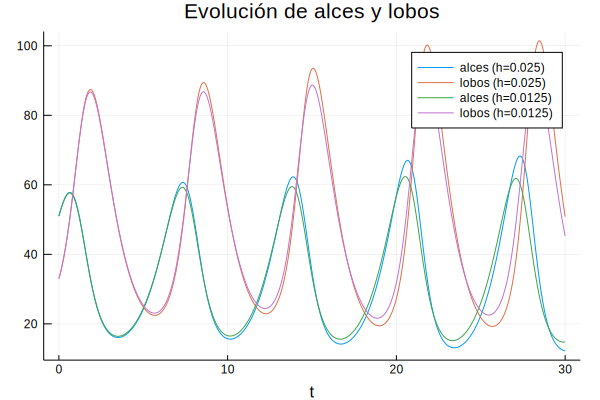

In [10]:
tt2 = res2[:,1]
vv2 = res2[:,2]
ww2 = res2[:,3]

plot!(tt2,[vv2, ww2],title="Evolución de alces y lobos",xlabel="t",label=["alces (h=0.0125)" "lobos (h=0.0125)"])

 - **¿Cual de los resultados es de esperar que sea más precisos, los obtenidos con $h=0.0125$ o los obtenidos con $h=0.025$?.**

> **Respuesta**
>
>Es de esperar que los resultados con $h=0.0125$ (la longitud de paso más pequeña de las dos) den resultados más precisos.

 - **Al comparar los resultados obtenidos con $h=0.0125$ con los obtenidos con $h=0.025$, ¿se puede concluir que los resultados obtenidos con $h=0.025$ son muy precisos?.**
 
> **Respuesta**
>
>No, está claro que no son muy precisos. En caso de ser muy precisos, también lo serían los resultados obtenidos con $h=0.0125$, de modo que sus gráficas serían mucho más parecidas entre sí.

<a href="#top">Back to the top</a>

## 3-Simulación de un péndulo
**Simulación de un péndulo bajo el efecto de la gravedad y la resistencia del aire**

Consideraremos la siguiente EDO de segundo orden, que modela el
  movimiento de un pendulo formado por una esfera de superficie suave unida al eje de giro por una varilla. Se supone que el péndulo está inmerso en aire, y se tiene en cuenta el efecto sobre la esfera de la acceleración de la gravedad, la resistencia del aire al movimiento de la esfera, pero no sobre la varilla, que se considera de masa y diametro de sección transversal despreciable (con respecto a la masa y el radio de la esfera respectivamente).  
  
  En dicho modelo, $\theta(t)$ es el ángulo (con respecto a la posición vertical) de la varilla en el instante $t$,
$L$ es la distancia del eje de giro al centro de la esfera, $g$ es la acceleración de la
gravedad, $R$ es el radio de la esfera, $\rho_e$ es la densidad de la esfera, $\rho_a$ es la densidad del aire, y $\mu_a$ es la densidad dinámica del aire. La ecuación diferencial (de segundo orden) que se obtiene es

<a id='Edo-Pendulo'></a>
\begin{equation*}
        \frac{d^2 \theta}{dt^2} = -\frac{g}{L}\, \sin(\theta) - \sigma\, \frac{3 \rho_a\, L\, C_D(Re)}{8\, \rho_e \, R}\, \left|\frac{d\theta}{dt}\right|^2, \tag{4}
\end{equation*}
    
donde  $\sigma=1$ si $\frac{d\theta}{dt}>0$, y $\sigma=-1$ en caso contrario, y
\begin{equation*}
        Re = \frac{2\, \rho_a\, R\, L}{\mu_a} \left| \frac{d \theta}{dt}\right|, \quad
        C_D(Re)  = \left\{
        \begin{matrix}
       \frac{24}{Re} + \frac{2}{5} +\frac{6}{1+\sqrt{Re}} & \mbox{ si} & Re>0,\\
       0  \phantom{ \frac{2}{5} +\frac{6}{1+\sqrt{Re}} }  & \mbox{ si} & Re=0.
        \end{matrix}
        \right. 
\end{equation*}

Aquí, $C_D(Re)$ es el _coeficiente de arrastre_ de un fluido cualquiera sobre una esfera de superficie suave (ya considerado anteriormente, que es función del _número de Reynols_ $Re$, directamente proporcional a la velocidad $|v|=L\, |d\theta/dt|$ de la esfera).

Consideraremos los siguientes valores de los parámetros del problema, correspondientes al caso de un péndulo de 20cm de longitud con una esfera de aluminio de 2cm de radio, inmersa en  aire (a $20^oC$  con una presión estándar de una atmósmera):   


<a id='Inicial-cond'></a>
\begin{equation}
L=0.2\, \mathrm{m}, \ 
R=0.02\, \mathrm{m}, \  
\rho_e=2712\, \mathrm{Kg}/\mathrm{m^3}, \ 
\rho_a = 1.205\,  kg/m^3, \ 
\mu_a = 1.789\times 10^{-5}\,  kg/(\mathrm{m} \,\mathrm{seg}), \ 
g=9.8\, \mathrm{m}/\mathrm{seg}^2. \tag{5}
\end{equation}

Queremos simular la evolución del ángulo $\theta(t)$ con respecto del tiempo, para $t \in [0,50]$.  En particular, consideraremos el caso en que inicialmente se deja la varilla inmóvil en posición casi vertical
 \begin{equation*}
   \theta(0)=\pi-0.001, \quad \frac{d\theta}{dt}(0)=0.
 \end{equation*}

### 3.1- Ejercicio

- **Reescribir la ecuación de segundo órden [(4)](#Edo-Pendulo) como un sistema de dos ecuaciones de primer orden, añadiendo para ello una nueva variable $\omega$ para la velocidad angular $\frac{d\theta}{dt}$, de tal modo que el vector de estados en este sistema es $u = (\theta, \omega)$. Implementar la función $f$ que hace que dicho sistema de dos ecuaciones de primer orden sea equivalente a [(2)](#Edo-Compacta).**

In [11]:
function f(t,u,p)
    L = p[1]
    g = p[2]
    rhoe = p[3]
    R = p[4]
    rhoa = p[5]
    mu = p[6]
    theta = u[1]
    omega = u[2]
    if omega==0 
        Cd = 0
    else
        Re = 2*rhoa*R*L*abs(omega)/mu
        Cd = 24/Re + 0.4 + 6/(1+sqrt(Re))
    end
    sigma = 
    dtheta = omega
    aux3 = 3*L*rhoa/(8*R*(rhoe))*Cd*abs(omega)*omega
    domega = -g/L*sin(theta) - aux3        
    [dtheta,domega] 
end

f (generic function with 1 method)

- **Evaluar la función f recién implementada para los valores de los parámetros constantes dados 
en [(5)](#Inicial-cond) para $t=0$, $\theta=\pi/2$, $\omega=0.1$.**

In [13]:
 L = 0.2
 g = 9.8
 rhoe = 2712  # Densidad del aluminio
 R = 0.02
 rhoa = 1.205 # densidad del aire a 20ºC al nivel del mar
 mu = 1.789e-5 # viscosidad dinámica del aire a 20ºC al nivel del mar
 p = [L, g, rhoe, R, rhoa, mu]
 f(0., [pi/2, 0.1], p)

2-element Array{Float64,1}:
   0.1             
 -49.00002607219265

> **Comprobación**
>
> Debería de dar como resultado el vector [0.1, -49.00002607219265]. 

### 3.2- Ejercicio

- **Aproximar la solucion $\theta(t)$ para $t=t_0,t_1,t_2,\ldots,t_n=50$, donde $t_k=50 \, k/n$, $n=24000$, utilizando el método de Euler con longitud de paso $h=50/n=1/480$.**

In [14]:
  t0 = 0
  T = 50
  u0 = [π-0.001,0.]
  n = 24000
  res = Euler(u0,t0,T,n,f,p)

24001×3 Array{Float64,2}:
  0.0            3.14059    0.0        
  0.00208333     3.14059   -0.000102083
  0.00416667     3.14059   -0.000204167
  0.00625        3.14059   -0.000306272
  0.00833333     3.14059   -0.00040842 
  0.0104167      3.14059   -0.000510634
  0.0125         3.14059   -0.000612934
  0.0145833      3.14059   -0.000715343
  0.0166667      3.14059   -0.000817882
  0.01875        3.14058   -0.000920574
  0.0208333      3.14058   -0.00102344 
  0.0229167      3.14058   -0.0011265  
  0.025          3.14058   -0.00122978 
  ⋮                                    
 49.9771      -537.92     -10.8021     
 49.9792      -537.943    -10.8682     
 49.9812      -537.965    -10.9361     
 49.9833      -537.988    -11.0057     
 49.9854      -538.011    -11.077      
 49.9875      -538.034    -11.1499     
 49.9896      -538.057    -11.2245     
 49.9917      -538.081    -11.3006     
 49.9937      -538.104    -11.3783     
 49.9958      -538.128    -11.4576     
 49.9979      

- **Representar gráficamente la evolución de $\theta(t)$ con respecto del tiempo.**

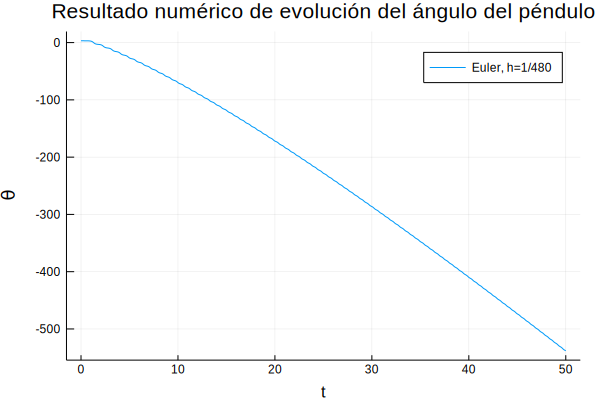

In [15]:
  tt = res[:,1]
  thetas = res[:,2]
  omegas = res[:,3]
  plot(tt,thetas,title="Resultado numérico de evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label="Euler, h=1/480")

### 3.3- Ejercicio

- **Guardar la secuencia de valores de los ángulos obtenidos en un fichero, y probar a utilizarlo para realizar una animación del movimiento del péndulo. Interpretar los resultados para concluir si la simulación del movimiento del péndulo tiene sentido desde el punto de vista físico.**

In [16]:
data="./angulos_pendulo.txt"
f1=open(data,"w")
writedlm(f1,thetas)
close(f1)

- **Realizar una animación del movimiento del péndulo ejecutando el codigo JavaScripts: <a href="http://www.ehu.eus/ccwmuura/irakaskuntza/sinum/animaciones/pendulo/pendulo_desde_fichero.html">Fichero html</a>, especificando el nombre del archivo en el que han guardado la secuencia de valores de los ángulos.**

- **¿Parece un movimiento realista?**

> **Respuesta**
>
>_No tiene sentido físico, puesto que el péndulo da vueltas (en el sentido de las agujas del reloj) sin cesar. Además gira cada vez más rápido, lo cual indicaría que la energía del sistema va creciendo, en lugar de decrecer debido a la resistencia del aire._

### 3.4- Ejercicio

- **Volver a aplicar el método de Euler para obtener aproximaciones de la solución para $t=t_0,t_1,t_2,\ldots,t_{24000}$, donde $t_k=\frac{50 \, k}{24000}$, pero esta vez con longitud de paso $h=1/960$.**

In [31]:
res2 = Euler(u0,t0,T,n,f,p,2)

24001×3 Array{Float64,2}:
  0.0            3.14059    0.0        
  0.00208333     3.14059   -0.000102083
  0.00416667     3.14059   -0.000204177
  0.00625        3.14059   -0.000306304
  0.00833333     3.14059   -0.000408485
  0.0104167      3.14059   -0.000510742
  0.0125         3.14059   -0.000613097
  0.0145833      3.14059   -0.000715571
  0.0166667      3.14059   -0.000818186
  0.01875        3.14058   -0.000920965
  0.0208333      3.14058   -0.00102393 
  0.0229167      3.14058   -0.0011271  
  0.025          3.14058   -0.0012305  
  ⋮                                    
 49.9771      -406.45      -9.4957     
 49.9792      -406.47      -9.5903     
 49.9812      -406.49      -9.68563    
 49.9833      -406.51      -9.78167    
 49.9854      -406.531     -9.87838    
 49.9875      -406.551     -9.97572    
 49.9896      -406.572    -10.0737     
 49.9917      -406.593    -10.1722     
 49.9937      -406.614    -10.2712     
 49.9958      -406.636    -10.3707     
 49.9979      

 - **Representar en una misma figura la evolución del ángulo del péndulo correspondiente a la aplicación de Euler con $h=1/480$ y con $h=1/960$ respectivamente.**

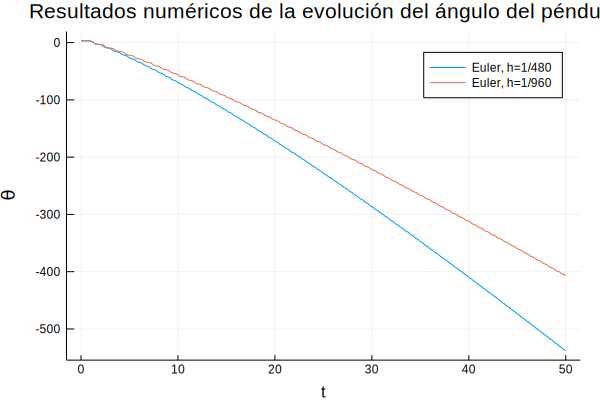

In [32]:
tt2 = res2[:,1]
thetas2 = res2[:,2]
omegas2 = res2[:,3]
plot(tt,thetas,title="Resultados numéricos de la evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label="Euler, h=1/480")
plot!(tt2,thetas2, label="Euler, h=1/960")

### 3.5- Ejercicio

- **¿Son consistentes los resultados (es decir, son tan parecidas que no se distinguen a simple vista)?** 

> **Respuesta**
>
>Los resultados no son consitentes, pues los valores de los ángulos en cada caso son muy distintos. Parece que las longitudes de paso utilizadas no son lo suficientemente pequeñas, de modo que los errores cometidos por el método son demasiado grandes.

### 3.6- Ejercicio

- **Repetir los cálculos con longitudes de paso $h$ cada vez más pequeñas (obteniendo por tanto aproximaciones cada vez más precisas) hasta asegurarnos de que obtenemos resultados consistentes (más en concreto, hasta que las gráficas de $\theta$ con respecto de $t$ de las dos aproximaciones más precisas no se distinguen en la resolución de la pantalla del ordenador).**

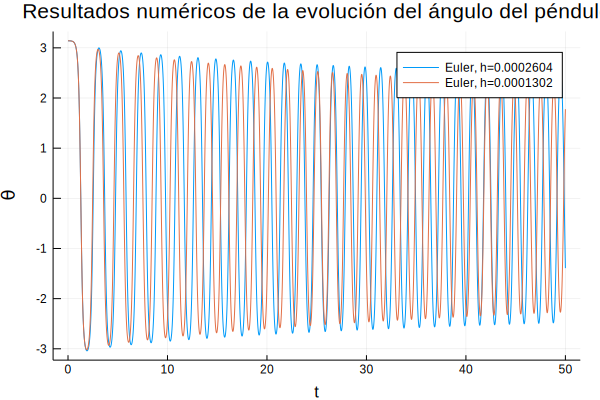

In [33]:
m = 2^3
n = 24000
res = Euler(u0,t0,T,n,f,p,m)
tt = res[:,1]  # En tt se guardan 24001 puntos uniformemente espaciados en [0,50]
thetas = res[:,2] # Valores de θ correspondientes a los tiempos del vector tt
omegas = res[:,3] # Valores de ω correspondientes a los tiempos del vector tt

res2 = Euler(u0,t0,T,n,f,p,2m)
tt = res2[:,1] # En tt se guardan 24001 puntos uniformemente espaciados en [0,50]
thetas2 = res2[:,2] 
omegas2 = res2[:,3]

 plot(tt,thetas,title="Resultados numéricos de la evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label=string("Euler, h=", string(Float16(T/(n*m)))))

 plot!(tt,thetas2, label=string("Euler, h=", string(Float16(T/(2*n*m)))))

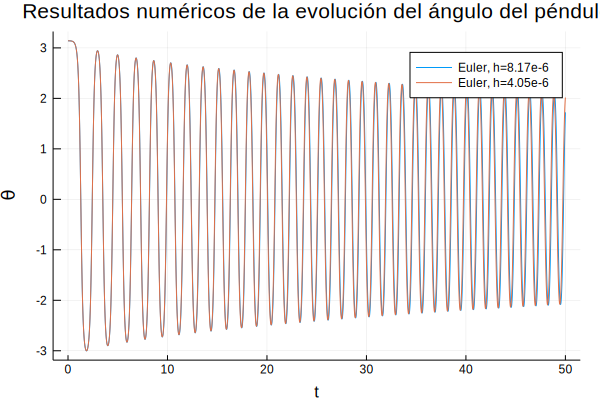

In [34]:
m = 2^8
n = 24000
res = Euler(u0,t0,T,n,f,p,m)
tt = res[:,1]  # En tt se guardan 24001 puntos uniformemente espaciados en [0,50]
thetas = res[:,2] # Valores de θ correspondientes a los tiempos del vector tt
omegas = res[:,3] # Valores de ω correspondientes a los tiempos del vector tt

res2 = Euler(u0,t0,T,n,f,p,2m)
tt = res2[:,1] # En tt se guardan 24001 puntos uniformemente espaciados en [0,50]
thetas2 = res2[:,2] 
omegas2 = res2[:,3]

 plot(tt,thetas,title="Resultados numéricos de la evolución del ángulo del péndulo", 
                 xlabel = "t", ylabel="\\theta", label=string("Euler, h=", string(Float16(T/(n*m)))))

 plot!(tt,thetas2, label=string("Euler, h=", string(Float16(T/(2*n*m)))))

- **Comentar el proceso de obtención de aproximaciones cada vez más precisas de los valores de los ángulos.**

> **Comentarios**
>
> Los resultados presentados en las gráficas obtenidas para $h=50/(8*24000)$ y $h=50/(16*24000)$   se podrían corresponden al movimiento de un péndulo. Sin embargo, los resultados no son fiables, pues difieren entre sí claramente: En un caso, el movimiento del péndulo se amortigua más rápidamente en el otro. Debemos pues utilizar discretizaciones aún más finas.
> 
> Los resultados obtenidas para $h=50/(256*24000)$ y $h=50/(512*24000)$ son consistentes (la curva azul y la roja no se distinguen visualmente entre sí) en casi todo el intervalo temporal, aunque justo al final del intervalo se empiezan a distinguir.


### 3.7- Ejercicio

 - **Utilizar los resultados finales para guardar en un fichero los datos de $\theta$ para $n=24001$ valores de $t$ uniformemente espaciados en el intervalo $[0,50]$. Realizar, haciendo uso de dicho fichero, la simulación animada del péndulo inmerso en aire. ¿Parece ahora realista dicha simulación?** 


In [18]:
data2="./angulos_pendulo_2.txt"
f2=open(data2,"w");
writedlm(f2,thetas2)
close(f2);

Ejecutar el codigo JavaScripts: <a href="http://www.ehu.eus/ccwmuura/irakaskuntza/sinum/animaciones/pendulo/pendulo_desde_fichero.html">Fichero html</a>


- **¿Se obtiene ahora una simulación realista?**

> **Respuesta**
> 
> _Si, ahora los resultados son realistas._

<a href="#top">Back to the top</a>

### Valoración

_Incluir aquí los comentarios de valoración de la tarea a entregar (dificultad, interés, etc, incluidas, si se quiere, sugerencias de mejora del ejercicio), así como una estimación del tiempo dedicado al trabajo de la semana (desglosado en el tiempo de estudio de material teórico, tiempo de dedicación a la participación activa o pasiva en los foros, tiempo de implementación y experimentación con los problemas prácticos planteados, y tiempo de preparación del documento jupyter final)._